## Import Needed Classes

In [2]:
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [4]:
def acc_report(y_test, y_pred):
    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

In [5]:
def plot_feature_importances(data_train, model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,16))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [6]:
def run_XGB(Xtrain, ytrain, Xtest ,ytest, **kwargs):
    # Build a regular tree as baseline
    boost = XGBClassifier(gpu_id=0, n_jobs=12, **kwargs )
    boost.fit(Xtrain, ytrain, eval_set=[(Xtrain, ytrain), (Xtest, ytest)],
        eval_metric='logloss',verbose=False)
    
    # Make predictions for Train data
    ypred_train = boost.predict(Xtrain)
    # Make predictions for test data
    ypred_test = boost.predict(Xtest)
    return boost, ypred_train, ypred_test

## Load Data for Modeling

In [6]:
#### Load Data for Modeling
import pandas as pd

data = pd.read_csv('./data/2018_model_data.csv')

In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True)

## Create features, labels, training, and test data
# Build Baseline XGBoost Tree Balanced


In [11]:
#### Create features, labels, training, and test data


In [8]:
# Split the dataset in the ratio train 80% and test 20%
X = data.drop("DELAYED", axis = 1)
y = data['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Train the classifier and make predictions

In [10]:
#%%script echo skipping
boost_clf1, y_pred_train1, y_pred_test1 = run_XGB(X_train_scaled, y_train, X_test_scaled, y_test,
                                                random_state=10, 
                                                )

## Check predictive performance

In [11]:
#x Train and y train
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90   1249891
           1       0.77      0.08      0.15    304973

    accuracy                           0.82   1554864
   macro avg       0.79      0.54      0.52   1554864
weighted avg       0.81      0.82      0.75   1554864



In [12]:
#x Test and y test
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.81      0.99      0.90    312133
           1       0.75      0.08      0.14     76583

    accuracy                           0.81    388716
   macro avg       0.78      0.54      0.52    388716
weighted avg       0.80      0.81      0.75    388716



## Observation Between the Train and the Test accuracy we have <br>
82% and F1 of 52% vs 81% and F1 of 52% 

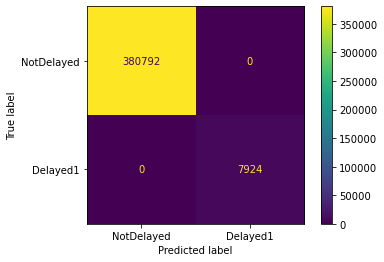

In [15]:
# Alternative confusion matrix
plot_confusion_matrix(boost_clf1, X_test_scaled, y_pred_test1,
                      display_labels={'Delayed1', 'NotDelayed'}, values_format='.0f')
plt.show()

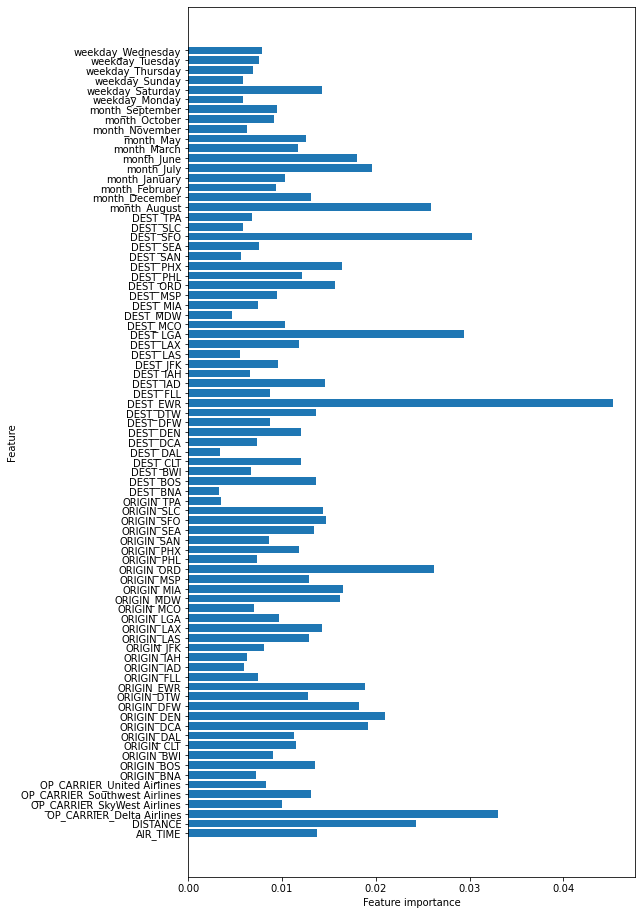

In [16]:

plot_feature_importances(X_train, boost_clf1)

In [ ]:
print(boost_clf1.)

In [ ]:
print(boost_clf1.get_xgb_params)

## 2Train the classifier and make predictions

In [14]:
#scale_pos_weight is from training set 
#total_negative_examples / total_positive_examples


In [17]:
#%%script echo skipping
boost_clf2, y_pred_train2, y_pred_test2 = run_XGB(X_train_scaled, y_train, X_test_scaled, y_test,
                                                random_state=10, scale_pos_weight=4
)

## Check predictive performance

In [18]:
#x Train and y train
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77   1249891
           1       0.32      0.58      0.41    304973

    accuracy                           0.67   1554864
   macro avg       0.59      0.64      0.59   1554864
weighted avg       0.76      0.67      0.70   1554864



In [19]:
#x Test and y test
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77    312133
           1       0.31      0.57      0.40     76583

    accuracy                           0.67    388716
   macro avg       0.59      0.63      0.59    388716
weighted avg       0.76      0.67      0.70    388716



## Observation Between the Train and the Test accuracy we have <br>
82% and F1 of 52% vs 81% and F1 of 52% 

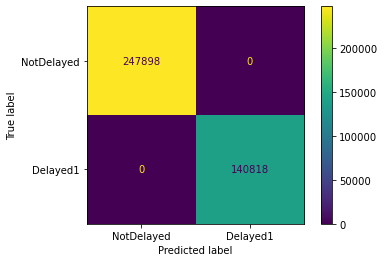

In [20]:
# Alternative confusion matrix
plot_confusion_matrix(boost_clf2, X_test_scaled, y_pred_test2,
                      display_labels={'Delayed1', 'NotDelayed'},values_format='.0f')
plt.show()

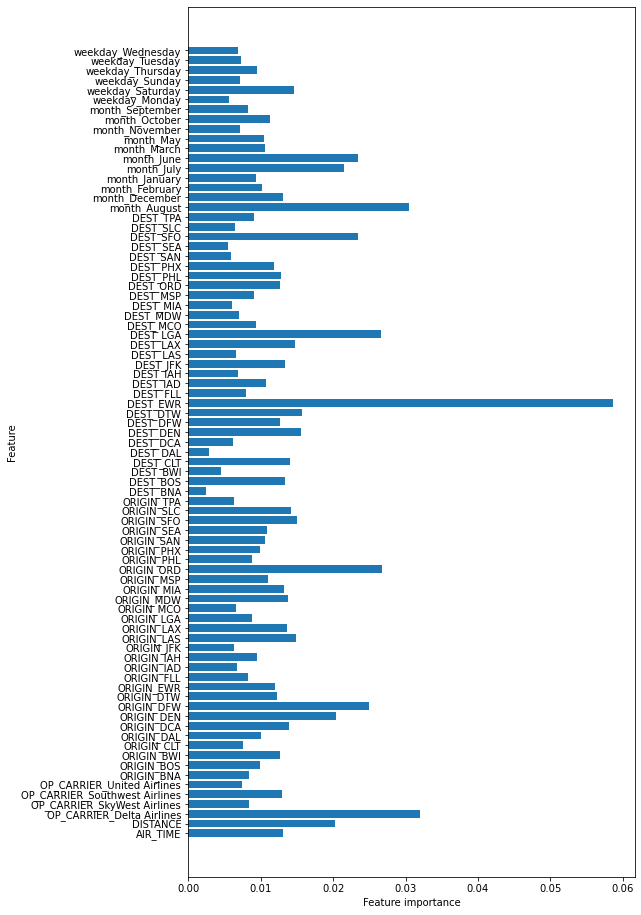

In [21]:

plot_feature_importances(X_train, boost_clf2)

In [ ]:
print(boost_clf2.)

In [ ]:
print(boost_clf2.get_xgb_params)

# GridSearch for XGB optimal params

 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
clf = XGBClassifier()

param_grid = {
    'learning_rate': [0.1],
     'n_estimators' : [100],
    'max_depth': [10],
     'min_child_weight' : [5],
    'gamma': [0],
    'subsample' :  [0.8],
    'colsample_bytree' : [0.8],
     'objective' :['binary:logistic'],
     'scale_pos_weight' :[1],
     'random_state' : [27],
    'n_jobs' : [12],
    'early_stopping_rounds' : [10],
    'gpu_id' : [1]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3,return_train_score=True)
gs_tree.fit(X_train_scaled, y_train)



In [24]:
gs_tree.scorer_, gs_tree.best_params_, gs_tree.best_score_

(<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 {'colsample_bytree': 0.8,
  'early_stopping_rounds': 10,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 10,
  'min_child_weight': 5,
  'n_estimators': 100,
  'n_jobs': -1,
  'objective': 'binary:logistic',
  'random_state': 27,
  'scale_pos_weight': 1,
  'subsample': 0.8},
 0.8139772996223463)

In [25]:
gs_tree.cv_results_

{'mean_fit_time': array([128.17369954, 128.67897948, 271.34017603, 245.56594141]),
 'std_fit_time': array([ 2.37646103,  0.50275505, 14.46040803,  5.82778692]),
 'mean_score_time': array([3.24069262, 3.44777815, 5.16003291, 5.11349257]),
 'std_score_time': array([0.03590733, 0.27582735, 0.4436175 , 0.31495155]),
 'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.8, 0.8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_early_stopping_rounds': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(da

In [29]:
# Mean training score
dt_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])

# Mean test score
#dt_gs_testing_score = gs_tree.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
#print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

Mean Training Score: 81.19%


Observation 
       'min_child_weight' : [5],
    'max_depth': [10],
    'learning_rate': [0.1],
     'n_estimators' : [100],
    
     
    'gamma': [0],
    'subsample' :  [0.8],
    'colsample_bytree' : [0.8],
     'objective' :['binary:logistic'],
     'scale_pos_weight' :[1],
     'random_state' : [27],
    'n_jobs' : [12],
    'early_stopping_rounds' : [10],
    'gpu_id' : [1]
Mean Training Score: 81.19%


# GridSearch 2 for optimal params

In [ ]:
clf = DecisionTreeClassifier()

param_grid = {
        'min_child_weight' : [5],
    'max_depth': [10],
    'learning_rate': [0.1],
     'n_estimators' : [100],
    
     
    'gamma': [0],
    'subsample' :  [0.8],
    'colsample_bytree' : [0.8],
     'objective' :['binary:logistic'],
     'scale_pos_weight' :[1],
     'random_state' : [27],
    'n_jobs' : [12],
    'early_stopping_rounds' : [10],
    'gpu_id' : [1]
}

gs_tree2 = GridSearchCV(clf, param_grid, cv=3,return_train_score=True)
gs_tree2.fit(X_train_scaled, y_train)

gs_tree2.best_params_

In [ ]:
gs_tree2.cv_results_

In [ ]:
# Mean training score
dt_gs_training_score = np.mean(gs_tree2.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = gs_tree2.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

Observation {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 50,
 'min_samples_split': 200}
Mean Training Score: 64.44%
Mean Test Score: 19.70%

# Run XGBModel with 1st Optimal Params

## Train the classifier and make predictions

In [81]:
boost_clf2, y_pred_train2, y_pred_test2 = run_XGB(X_train_scaled, y_train, 
                                                  X_test_scaled,  y_test,
                                      random_state=10,
                                      min_child_weight=6,
                                      max_depth=10,    learning_rate=0.1,
                                      n_estimators=100, gamma=0,    
                                      subsample=0.8,    colsample_bytree=0.8,
                                      scale_pos_weight=4.1,
                                      early_stopping_rounds=10,    
)

[13:55:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




## Check predictive performance

In [82]:
#x Train and y train
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77   1249891
           1       0.32      0.61      0.42    304973

    accuracy                           0.67   1554864
   macro avg       0.60      0.65      0.60   1554864
weighted avg       0.77      0.67      0.70   1554864



In [83]:
#x Test and y test
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76    312133
           1       0.31      0.59      0.41     76583

    accuracy                           0.66    388716
   macro avg       0.59      0.64      0.59    388716
weighted avg       0.76      0.66      0.69    388716



## Observation Between the Train and the Test accuracy we have <br>
82% and F1 of 52% vs 81% and F1 of 52% 

In [7]:
# Alternative confusion matrix
plot_confusion_matrix(boost_clf2, X, y ,values_format='.3g')
plt.show()

NameError: name 'boost_clf2' is not defined

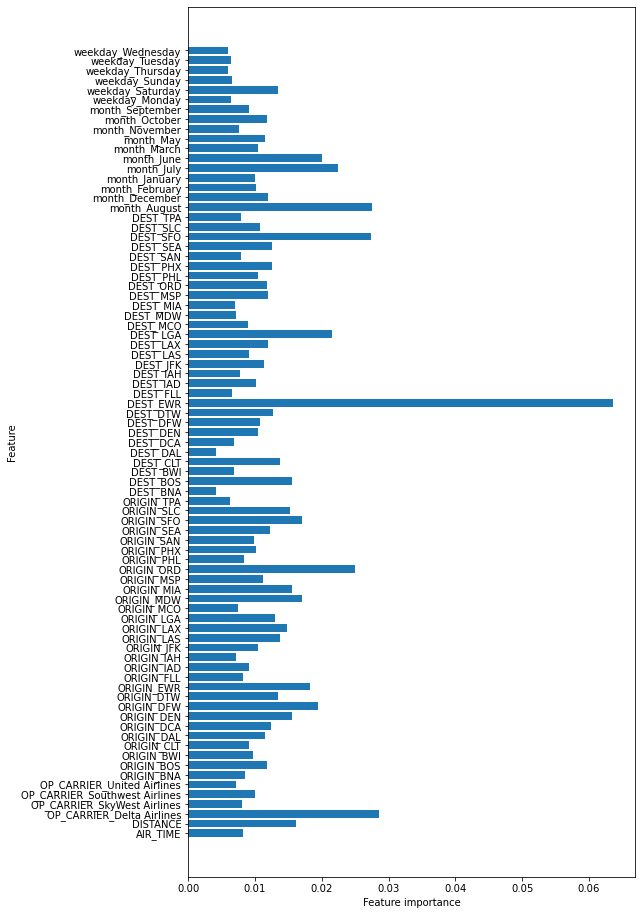

In [76]:

plot_feature_importances(X_train, boost_clf2)

In [ ]:
print(boost_clf2.)

In [41]:
print(boost_clf2.get_xgb_params)

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=10, gamma=0, gpu_id=1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)>


# GridSearch 2 for optimal params

In [42]:
clf = XGBClassifier()

param_grid = {
    'learning_rate': [0.1],
    'n_estimators' : [100],
    'max_depth': [10],
    'min_child_weight' : [5],
    'gamma': [0],
    'subsample' :  [0.8],
    'colsample_bytree' : [0.8],
    'objective' :['binary:logistic'],
    'scale_pos_weight' :[1],
    'random_state' : [27],
    'n_jobs' : [12],
    'early_stopping_rounds' : [10],
    'gpu_id' : [1]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3,return_train_score=True)
gs_tree.fit(X_train_scaled, y_train)



[11:30:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:30:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:34:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:211: Only 1 GPUs are visible, setting `gpu_id` to 0
[11:34:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are n

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'colsample_bytree': [0.8],
                         'early_stopping_rounds': [10], 'gamma': [0],
                         '

In [24]:
gs_tree.scorer_, gs_tree.best_params_, gs_tree.best_score_

(<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 {'colsample_bytree': 0.8,
  'early_stopping_rounds': 10,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 10,
  'min_child_weight': 5,
  'n_estimators': 100,
  'n_jobs': -1,
  'objective': 'binary:logistic',
  'random_state': 27,
  'scale_pos_weight': 1,
  'subsample': 0.8},
 0.8139772996223463)

In [25]:
gs_tree.cv_results_

{'mean_fit_time': array([128.17369954, 128.67897948, 271.34017603, 245.56594141]),
 'std_fit_time': array([ 2.37646103,  0.50275505, 14.46040803,  5.82778692]),
 'mean_score_time': array([3.24069262, 3.44777815, 5.16003291, 5.11349257]),
 'std_score_time': array([0.03590733, 0.27582735, 0.4436175 , 0.31495155]),
 'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.8, 0.8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_early_stopping_rounds': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(da

In [29]:
# Mean training score
dt_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])

# Mean test score
#dt_gs_testing_score = gs_tree.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
#print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

Mean Training Score: 81.19%


Observation {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 50,
 'min_samples_split': 200}  
Mean Training Score: 64.44%
Mean Test Score: 19.70%

# GridSearch 3 for optimal params

In [ ]:
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [16, 17],
    'min_samples_split': [50],
    'class_weight' : ['balanced']
}

gs_tree3 = GridSearchCV(clf, param_grid, cv=3,return_train_score=True)
gs_tree3.fit(X_train_scaled, y_train)

gs_tree3.best_params_

In [ ]:
Observation  FINAL{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 16,
 'min_samples_split': 50}

In [ ]:
Observation{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 16,
 'min_samples_split': 50}

Observation {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 14,
 'min_samples_split': 50}

In [ ]:
Observation {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 15,
 'min_samples_split': 50}

In [ ]:
gs_tree3.cv_results_

In [ ]:
# Mean training score
dt_gs_training_score = np.mean(gs_tree3.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = gs_tree3.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

## Train the classifier and make predictions